# Лабораторная работа №2 Коэффициенты корреляции

In [1]:
!pip install pyreadstat

In [2]:
#импорт даных
import pyreadstat
df1, meta = pyreadstat.read_sav('advert.sav')
df1

,advert,sales
0,4.686366,12.228370
1,6.410798,11.843640
2,5.473385,12.247544
3,3.432262,11.098965
4,4.387805,10.966614
5,2.145931,8.751658
6,1.539042,7.747320
7,2.665540,10.503424
8,1.244453,6.708508
9,1.774736,7.604362


## КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА

In [3]:
df1.corr()

,advert,sales
advert,1.000000,0.915906
sales,0.915906,1.000000


In [4]:
from scipy.stats import pearsonr
coef1, p1 = pearsonr(df1.advert, df1.sales)
coef1

0.9159060896848583

## Построение графика

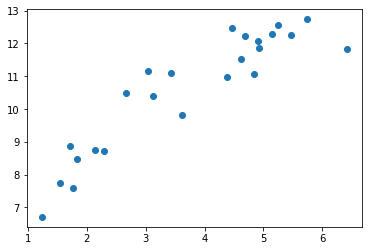

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df1.advert, df1.sales)

## КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМАНА

In [6]:
from scipy.stats import spearmanr

coef2, p2 = spearmanr(df1.advert, df1.sales)
coef2

0.8886956521739129

In [7]:
#Импорт данных для корреляции по трем переменным
df2, meta = pyreadstat.read_sav('hourlywagedata.sav')
del df2['position']
df2.head()

,agerange,yrsscale,hourwage
0,1.0,2.0,13.736234
1,1.0,2.0,16.440731
2,1.0,3.0,21.389108
3,1.0,1.0,11.377187
4,1.0,3.0,21.560778


In [8]:
#Обзор данных
df2.describe()

,agerange,yrsscale,hourwage
count,3000.000000,3000.000000,2911.000000
mean,2.136000,3.527333,20.015860
std,0.661551,1.349022,4.003089
min,1.000000,1.000000,4.215732
25%,2.000000,3.000000,17.415044
50%,2.000000,4.000000,20.180008
75%,3.000000,5.000000,22.784393
max,3.000000,6.000000,32.803854


т.к. hourwage имеет 89 пропущенных значений заменим их на среднее

In [9]:
df2['hourwage'] = df2['hourwage'].fillna(df2.hourwage.mean())

In [11]:
df2.corr()

,agerange,yrsscale,hourwage
agerange,1.000000,0.664630,0.144909
yrsscale,0.664630,1.000000,0.246743
hourwage,0.144909,0.246743,1.000000


In [12]:
df_hypothesis = df2.copy()
del df_hypothesis['yrsscale']
df_hypothesis.corr()

,agerange,hourwage
agerange,1.000000,0.144909
hourwage,0.144909,1.000000


In [13]:
from scipy.stats.stats import pearsonr

coef, p = pearsonr(df_hypothesis.agerange, df_hypothesis.hourwage)
coef

0.14490906459667158

В ходе выполнения данной лабораторной работы, были освоены базовые методы корреляционного анализа. Были рассмотрены случаи с двумя и тремя переменными.